<a href="https://colab.research.google.com/github/ancestor9/24_fall_python-programimming-2/blob/main/Capstone_Design_01_rocket_launch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='red'> **Data Pipeline flows with Stepwise Blocks**

- **Block 1. Create a Temporary Folder (create_tmp_folder) & Download Launches Data(download_launches):**
> This step will ensure that the necessary directories exist before proceeding with downloading and processing data. In this step, we'll fetch data from an external API and save it to a local JSON file.
- **Block 2. Get Pictures (get_pictures):**
> This part involves reading the downloaded JSON, extracting image URLs, and downloading these images to a specified directory.
- **Block 3. Notify (notify):**
> Finally, a simple notification step that counts the images downloaded and outputs a message.


<img src ='https://t4.ftcdn.net/jpg/05/39/88/87/360_F_539888762_pU6WAEuRv8sWB3Paqae7J0lHdPprEdoJ.jpg'>

##  <font color='red'>**Block 1: Create a Temporary Folder & Download Launches Data**
> ### **@data_loader**

In [19]:
import os
os.getcwd()

'/content'

In [20]:
cur_dir = os.getcwd()
cur_dir

'/content'

In [21]:
print(cur_dir)
print(f"{cur_dir}/rocket")

/content
/content/rocket


In [22]:
#os.makedirs(f"rocket1/rocke2/rocke3", exist_ok=True)
os.makedirs('rocket', exist_ok = True)

### https://ll.thespacedevs.com/2.0.0/launch/upcoming 직접 가서 확인하기

In [79]:
import requests
url = 'https://ll.thespacedevs.com/2.0.0/launch/upcoming'
response = requests.get(url)
print(response)

<Response [200]>


In [24]:
print(type(response.content))

<class 'bytes'>


In [25]:
print(response.content) # binary file

b'{"count":326,"next":"https://ll.thespacedevs.com/2.0.0/launch/upcoming/?limit=10&offset=10","previous":null,"results":[{"id":"ca78b818-63d5-4280-853e-478db107b022","url":"https://ll.thespacedevs.com/2.0.0/launch/ca78b818-63d5-4280-853e-478db107b022/","launch_library_id":null,"slug":"h-iia-202-igs-radar-8","name":"H-IIA 202 | IGS Radar 8","status":{"id":3,"name":"Success"},"net":"2024-09-26T05:24:20Z","window_end":"2024-09-26T05:25:21Z","window_start":"2024-09-26T05:24:20Z","inhold":false,"tbdtime":false,"tbddate":false,"probability":null,"holdreason":"","failreason":"","hashtag":null,"launch_service_provider":{"id":98,"url":"https://ll.thespacedevs.com/2.0.0/agencies/98/","name":"Mitsubishi Heavy Industries","type":"Commercial"},"rocket":{"id":2999,"configuration":{"id":32,"launch_library_id":53,"url":"https://ll.thespacedevs.com/2.0.0/config/launcher/32/","name":"H-IIA","family":"H-II","full_name":"H-IIA 202","variant":"202"}},"mission":{"id":5896,"launch_library_id":null,"name":"IG

In [26]:
print(response.text)   # text file

{"count":326,"next":"https://ll.thespacedevs.com/2.0.0/launch/upcoming/?limit=10&offset=10","previous":null,"results":[{"id":"ca78b818-63d5-4280-853e-478db107b022","url":"https://ll.thespacedevs.com/2.0.0/launch/ca78b818-63d5-4280-853e-478db107b022/","launch_library_id":null,"slug":"h-iia-202-igs-radar-8","name":"H-IIA 202 | IGS Radar 8","status":{"id":3,"name":"Success"},"net":"2024-09-26T05:24:20Z","window_end":"2024-09-26T05:25:21Z","window_start":"2024-09-26T05:24:20Z","inhold":false,"tbdtime":false,"tbddate":false,"probability":null,"holdreason":"","failreason":"","hashtag":null,"launch_service_provider":{"id":98,"url":"https://ll.thespacedevs.com/2.0.0/agencies/98/","name":"Mitsubishi Heavy Industries","type":"Commercial"},"rocket":{"id":2999,"configuration":{"id":32,"launch_library_id":53,"url":"https://ll.thespacedevs.com/2.0.0/config/launcher/32/","name":"H-IIA","family":"H-II","full_name":"H-IIA 202","variant":"202"}},"mission":{"id":5896,"launch_library_id":null,"name":"IGS 

In [27]:
# prompt: response.text 를 데이터프레임으로

import pandas as pd
import json

# Assuming response.text contains a valid JSON string
data = json.loads(response.text)
data

{'count': 326,
 'next': 'https://ll.thespacedevs.com/2.0.0/launch/upcoming/?limit=10&offset=10',
 'previous': None,
 'results': [{'id': 'ca78b818-63d5-4280-853e-478db107b022',
   'url': 'https://ll.thespacedevs.com/2.0.0/launch/ca78b818-63d5-4280-853e-478db107b022/',
   'launch_library_id': None,
   'slug': 'h-iia-202-igs-radar-8',
   'name': 'H-IIA 202 | IGS Radar 8',
   'status': {'id': 3, 'name': 'Success'},
   'net': '2024-09-26T05:24:20Z',
   'window_end': '2024-09-26T05:25:21Z',
   'window_start': '2024-09-26T05:24:20Z',
   'inhold': False,
   'tbdtime': False,
   'tbddate': False,
   'probability': None,
   'holdreason': '',
   'failreason': '',
   'hashtag': None,
   'launch_service_provider': {'id': 98,
    'url': 'https://ll.thespacedevs.com/2.0.0/agencies/98/',
    'name': 'Mitsubishi Heavy Industries',
    'type': 'Commercial'},
   'rocket': {'id': 2999,
    'configuration': {'id': 32,
     'launch_library_id': 53,
     'url': 'https://ll.thespacedevs.com/2.0.0/config/launc

In [28]:
type(json)

module

In [29]:
type(pd)

module

In [30]:
type(data)

dict

In [31]:
data.keys()

dict_keys(['count', 'next', 'previous', 'results'])

## 방법 1

In [64]:
# prompt: data['results']를 데이터프레임으로

import pandas as pd
df = pd.DataFrame(data['results'])
df

,id,url,launch_library_id,slug,name,status,net,window_end,window_start,inhold,...,failreason,hashtag,launch_service_provider,rocket,mission,pad,webcast_live,image,infographic,program
0,ca78b818-63d5-4280-853e-478db107b022,https://ll.thespacedevs.com/2.0.0/launch/ca78b...,NaN,h-iia-202-igs-radar-8,H-IIA 202 | IGS Radar 8,"{'id': 3, 'name': 'Success'}",2024-09-26T05:24:20Z,2024-09-26T05:25:21Z,2024-09-26T05:24:20Z,False,...,,None,"{'id': 98, 'url': 'https://ll.thespacedevs.com...","{'id': 2999, 'configuration': {'id': 32, 'laun...","{'id': 5896, 'launch_library_id': None, 'name'...","{'id': 41, 'url': 'https://ll.thespacedevs.com...",False,https://thespacedevs-prod.nyc3.digitaloceanspa...,None,[]
1,bdfd3337-621d-4fc1-965f-1844638a3204,https://ll.thespacedevs.com/2.0.0/launch/bdfd3...,NaN,long-march-2d-unknown-payload,Long March 2D | Unknown Payload,"{'id': 1, 'name': 'Go'}",2024-09-27T10:35:00Z,2024-09-27T11:02:00Z,2024-09-27T10:22:00Z,False,...,,None,"{'id': 88, 'url': 'https://ll.thespacedevs.com...","{'id': 8361, 'configuration': {'id': 17, 'laun...","{'id': 6942, 'launch_library_id': None, 'name'...","{'id': 22, 'url': 'https://ll.thespacedevs.com...",False,https://thespacedevs-prod.nyc3.digitaloceanspa...,None,[]
2,0102940a-4a60-4686-b34d-ced3fed6c595,https://ll.thespacedevs.com/2.0.0/launch/01029...,NaN,falcon-9-block-5-crew-9,Falcon 9 Block 5 | Crew-9,"{'id': 1, 'name': 'Go'}",2024-09-28T17:17:20Z,2024-09-28T17:17:20Z,2024-09-28T17:17:20Z,False,...,,None,"{'id': 121, 'url': 'https://ll.thespacedevs.co...","{'id': 7538, 'configuration': {'id': 164, 'lau...","{'id': 5962, 'launch_library_id': None, 'name'...","{'id': 80, 'url': 'https://ll.thespacedevs.com...",False,https://thespacedevs-prod.nyc3.digitaloceanspa...,None,"[{'id': 5, 'url': 'https://ll.thespacedevs.com..."
3,2de44368-01af-448f-b0fb-d7aacdd86c0e,https://ll.thespacedevs.com/2.0.0/launch/2de44...,NaN,ceres-1-unknown-payload,Ceres-1 | Unknown Payload,"{'id': 2, 'name': 'TBD'}",2024-09-30T00:00:00Z,2024-09-30T00:00:00Z,2024-09-30T00:00:00Z,False,...,,None,"{'id': 1021, 'url': 'https://ll.thespacedevs.c...","{'id': 8318, 'configuration': {'id': 461, 'lau...","{'id': 6899, 'launch_library_id': None, 'name'...","{'id': 21, 'url': 'https://ll.thespacedevs.com...",False,https://thespacedevs-prod.nyc3.digitaloceanspa...,None,[]
4,525ed290-dd97-4187-9118-d71f0b8285be,https://ll.thespacedevs.com/2.0.0/launch/525ed...,NaN,falcon-9-block-5-oneweb-20,Falcon 9 Block 5 | OneWeb 20,"{'id': 2, 'name': 'TBD'}",2024-09-30T06:49:00Z,2024-09-30T07:28:00Z,2024-09-30T06:49:00Z,False,...,,None,"{'id': 121, 'url': 'https://ll.thespacedevs.co...","{'id': 8309, 'configuration': {'id': 164, 'lau...","{'id': 6890, 'launch_library_id': None, 'name'...","{'id': 16, 'url': 'https://ll.thespacedevs.com...",False,https://thespacedevs-prod.nyc3.digitaloceanspa...,None,"[{'id': 26, 'url': 'https://ll.thespacedevs.co..."
5,9d576892-dcf0-472b-92d1-37053ff549ab,https://ll.thespacedevs.com/2.0.0/launch/9d576...,NaN,falcon-9-block-5-starlink-group-10-10,Falcon 9 Block 5 | Starlink Group 10-10,"{'id': 2, 'name': 'TBD'}",2024-10-02T08:50:00Z,2024-10-02T12:50:00Z,2024-10-02T08:50:00Z,False,...,,None,"{'id': 121, 'url': 'https://ll.thespacedevs.co...","{'id': 8363, 'configuration': {'id': 164, 'lau...","{'id': 6944, 'launch_library_id': None, 'name'...","{'id': 80, 'url': 'https://ll.thespacedevs.com...",False,https://thespacedevs-prod.nyc3.digitaloceanspa...,None,"[{'id': 25, 'url': 'https://ll.thespacedevs.co..."
6,cd199e27-63cd-409c-817c-5c38039b17cd,https://ll.thespacedevs.com/2.0.0/launch/cd199...,NaN,vulcan-vc2s-certification-flight-2,Vulcan VC2S | Certification Flight 2,"{'id': 1, 'name': 'Go'}",2024-10-04T10:00:00Z,2024-10-04T13:00:00Z,2024-10-04T10:00:00Z,False,...,,None,"{'id': 124, 'url': 'https://ll.thespacedevs.co...","{'id': 8277, 'configuration': {'id': 201, 'lau...","{'id': 6858, 'launch_library_id': None, 'name'...","{'id': 29, 'url': 'https://ll.thespacedevs.com...",False,https://thespace

In [65]:
df.columns

Index(['id', 'url', 'launch_library_id', 'slug', 'name', 'status', 'net',
       'window_end', 'window_start', 'inhold', 'tbdtime', 'tbddate',
       'probability', 'holdreason', 'failreason', 'hashtag',
       'launch_service_provider', 'rocket', 'mission', 'pad', 'webcast_live',
       'image', 'infographic', 'program'],
      dtype='object')

In [73]:
df.iloc[:, 16:20]

,launch_service_provider,rocket,mission,pad
0,"{'id': 98, 'url': 'https://ll.thespacedevs.com...","{'id': 2999, 'configuration': {'id': 32, 'laun...","{'id': 5896, 'launch_library_id': None, 'name'...","{'id': 41, 'url': 'https://ll.thespacedevs.com..."
1,"{'id': 88, 'url': 'https://ll.thespacedevs.com...","{'id': 8361, 'configuration': {'id': 17, 'laun...","{'id': 6942, 'launch_library_id': None, 'name'...","{'id': 22, 'url': 'https://ll.thespacedevs.com..."
2,"{'id': 121, 'url': 'https://ll.thespacedevs.co...","{'id': 7538, 'configuration': {'id': 164, 'lau...","{'id': 5962, 'launch_library_id': None, 'name'...","{'id': 80, 'url': 'https://ll.thespacedevs.com..."
3,"{'id': 1021, 'url': 'https://ll.thespacedevs.c...","{'id': 8318, 'configuration': {'id': 461, 'lau...","{'id': 6899, 'launch_library_id': None, 'name'...","{'id': 21, 'url': 'https://ll.thespacedevs.com..."
4,"{'id': 121, 'url': 'https://ll.thespacedevs.co...","{'id': 8309, 'configuration': {'id': 164, 'lau...","{'id': 6890, 'launch_library_id': None, 'name'...","{'id': 16, 'url': 'https://ll.thespacedevs.com..."
5,"{'id': 121, 'url': 'https://ll.thespacedevs.co...","{'id': 8363, 'configuration': {'id': 164, 'lau...","{'id': 6944, 'launch_library_id': None, 'name'...","{'id': 80, 'url': 'https://ll.thespacedevs.com..."
6,"{'id': 124, 'url': 'https://ll.thespacedevs.co...","{'id': 8277, 'configuration': {'id': 201, 'lau...","{'id': 6858, 'launch_library_id': None, 'name'...","{'id': 29, 'url': 'https://ll.thespacedevs.com..."
7,"{'id': 121, 'url': 'https://ll.thespacedevs.co...","{'id': 7689, 'configuration': {'id': 164, 'lau...","{'id': 6496, 'launch_library_id': None, 'name'...","{'id': 80, 'url': 'https://ll.thespacedevs.com..."
8,"{'id': 121, 'url': 'https://ll.thespacedevs.co...","{'id': 2663, 'configuration': {'id': 161, 'lau...","{'id': 1087, 'launch_library_id': 1284, 'name'...","{'id': 87, 'url': 'https://ll.thespacedevs.com..."
9,"{'id': 98, 'url': 'https://ll.thespacedevs.com...","{'id': 7772, 'configuration': {'id': 486, 'lau...","{'id': 6290, 'launch_library_id': None, 'name'...","{'id': 209, 'url': 'https://ll.thespacedevs.co..."


In [75]:
for i in df.mission:
    print(i)

{'id': 5896, 'launch_library_id': None, 'name': 'IGS Radar 8', 'description': "The IGS Radar 8 is a Japanese radar reconnaissance satellite. The satellite is operated by the Cabinet Satellite Information Center. The satellite serves both Japan's national defense and civil natural disaster monitoring.", 'launch_designator': None, 'type': 'Government/Top Secret', 'orbit': {'id': 17, 'name': 'Sun-Synchronous Orbit', 'abbrev': 'SSO'}}
{'id': 6942, 'launch_library_id': None, 'name': 'Unknown Payload', 'description': 'Details TBD.', 'launch_designator': None, 'type': 'Unknown', 'orbit': {'id': 25, 'name': 'Unknown', 'abbrev': 'N/A'}}
{'id': 5962, 'launch_library_id': None, 'name': 'Crew-9', 'description': "SpaceX Crew-9 is the ninth crewed operational flight of a Crew Dragon spacecraft to the International Space Station as part of NASA's Commercial Crew Program.", 'launch_designator': None, 'type': 'Human Exploration', 'orbit': {'id': 8, 'name': 'Low Earth Orbit', 'abbrev': 'LEO'}}
{'id': 68

In [76]:
# prompt: df.mission을 데이터프레임으로
mission_df = pd.DataFrame(df.mission.tolist())
mission_df

,id,launch_library_id,name,description,launch_designator,type,orbit
0,5896,NaN,IGS Radar 8,The IGS Radar 8 is a Japanese radar reconnaiss...,None,Government/Top Secret,"{'id': 17, 'name': 'Sun-Synchronous Orbit', 'a..."
1,6942,NaN,Unknown Payload,Details TBD.,None,Unknown,"{'id': 25, 'name': 'Unknown', 'abbrev': 'N/A'}"
2,5962,NaN,Crew-9,SpaceX Crew-9 is the ninth crewed operational ...,None,Human Exploration,"{'id': 8, 'name': 'Low Earth Orbit', 'abbrev':..."
3,6899,NaN,Unknown Payload,Details TBD.,None,Unknown,"{'id': 25, 'name': 'Unknown', 'abbrev': 'N/A'}"
4,6890,NaN,OneWeb 20,A batch of 20 satellites for the OneWeb satell...,None,Communications,"{'id': 13, 'name': 'Polar Orbit', 'abbrev': 'PO'}"
5,6944,NaN,Starlink Group 10-10,A batch of satellites for the Starlink mega-co...,None,Communications,"{'id': 8, 'name': 'Low Earth Orbit', 'abbrev':..."
6,6858,NaN,Certification Flight 2,Replacement Vulcan test launch with inert payl...,None,Test Flight,"{'id': 8, 'name': 'Low Earth Orbit', 'abbrev':..."
7,6496,NaN,Hera,Hera is a space mission in development at the ...,None,Robotic Exploration,"{'id': 21, 'name': 'Asteroid', 'abbrev': 'Aste..."
8,1087,1284.0,Europa Clipper,Europa Clipper is the first dedicated mission ...,None,Planetary Science,"{'id': 6, 'name': 'Heliocentric N/A', 'abbrev'..."
9,6290,NaN,DSN 3 (Kirameki 3),"DSN 3, also known as Kirameki 3, is a geostati...",None,Communications,"{'id': 2, 'name': 'Geostationary Transfer Orbi..."


In [78]:
# prompt: df.mission을 데이터프레임으로, 단 jsonnormalize를 사용

from pandas import json_normalize

mission_df = json_normalize(df.mission)
mission_df


,id,launch_library_id,name,description,launch_designator,type,orbit.id,orbit.name,orbit.abbrev
0,5896,NaN,IGS Radar 8,The IGS Radar 8 is a Japanese radar reconnaiss...,None,Government/Top Secret,17,Sun-Synchronous Orbit,SSO
1,6942,NaN,Unknown Payload,Details TBD.,None,Unknown,25,Unknown,N/A
2,5962,NaN,Crew-9,SpaceX Crew-9 is the ninth crewed operational ...,None,Human Exploration,8,Low Earth Orbit,LEO
3,6899,NaN,Unknown Payload,Details TBD.,None,Unknown,25,Unknown,N/A
4,6890,NaN,OneWeb 20,A batch of 20 satellites for the OneWeb satell...,None,Communications,13,Polar Orbit,PO
5,6944,NaN,Starlink Group 10-10,A batch of satellites for the Starlink mega-co...,None,Communications,8,Low Earth Orbit,LEO
6,6858,NaN,Certification Flight 2,Replacement Vulcan test launch with inert payl...,None,Test Flight,8,Low Earth Orbit,LEO
7,6496,NaN,Hera,Hera is a space mission in development at the ...,None,Robotic Exploration,21,Asteroid,Asteroid
8,1087,1284.0,Europa Clipper,Europa Clipper is the first dedicated mission ...,None,Planetary Science,6,Heliocentric N/A,Helio-N/A
9,6290,NaN,DSN 3 (Kirameki 3),"DSN 3, also known as Kirameki 3, is a geostati...",None,Communications,2,Geostationary Transfer Orbit,GTO


## 방법 2

In [ ]:
## https://jsonformatter.org/json-viewer 로 확인하기

In [11]:
# prompt: data를 파일로 저장하기

with open('rocket/launches.json', 'w') as f:
  json.dump(data, f)


### Simple 예제
- with statement : with 함수 구문으로 context manager (open, close)

In [ ]:
# 여러 파일을 동시에 열어서 작업하는 예제
with open('file1.txt', 'w') as f1, open('file2.txt', 'w') as f2:
    f1.write("This is the first file.\n")
    f2.write("This is the second file.\n")

# 여러 명령어를 하나의 with 구문에서 수행
with open('file1.txt', 'r') as f1, open('file2.txt', 'r') as f2:
    content1 = f1.read()
    content2 = f2.read()

print("File 1 contents:", content1)
print("File 2 contents:", content2)

In [ ]:
# Convert the JSON data to a Pandas DataFrame
df = pd.json_normalize(data['results'])

# Now you have a DataFrame named 'df' containing the data
df

### Stream and Buffer : 흐르는 강물처럼 (River flows through it)

In [ ]:
# 바이너리 I/O
with open(f"rocket/launches.json", "wb") as f:
    f.write(response.content)

In [ ]:
# 텍스트 I/O
with open(f"rocket/launches.json", "w") as f:
    f.write(response.text)

In [17]:
import requests

def download_launches():
    cur_dir = '/content'
    url = 'https://ll.thespacedevs.com/2.0.0/launch/upcoming'
    os.makedirs(f"rocket", exist_ok=True)

    print(f"wahrer r u? : {cur_dir}/rocket")

    response = requests.get(url)

    with open(f"rocket/launches.json", "wb") as f:
        f.write(response.content)

    data = response.json()

    return pd.DataFrame(data)

In [18]:
import pandas as pd
download_launches()

wahrer r u? : /content/rocket


,count,next,previous,results
0,326,https://ll.thespacedevs.com/2.0.0/launch/upcom...,None,"{'id': 'ca78b818-63d5-4280-853e-478db107b022',..."
1,326,https://ll.thespacedevs.com/2.0.0/launch/upcom...,None,"{'id': 'bdfd3337-621d-4fc1-965f-1844638a3204',..."
2,326,https://ll.thespacedevs.com/2.0.0/launch/upcom...,None,"{'id': '0102940a-4a60-4686-b34d-ced3fed6c595',..."
3,326,https://ll.thespacedevs.com/2.0.0/launch/upcom...,None,"{'id': '2de44368-01af-448f-b0fb-d7aacdd86c0e',..."
4,326,https://ll.thespacedevs.com/2.0.0/launch/upcom...,None,"{'id': '525ed290-dd97-4187-9118-d71f0b8285be',..."
5,326,https://ll.thespacedevs.com/2.0.0/launch/upcom...,None,"{'id': '9d576892-dcf0-472b-92d1-37053ff549ab',..."
6,326,https://ll.thespacedevs.com/2.0.0/launch/upcom...,None,"{'id': 'cd199e27-63cd-409c-817c-5c38039b17cd',..."
7,326,https://ll.thespacedevs.com/2.0.0/launch/upcom...,None,"{'id': 'e1ffdd01-c146-44d0-a250-b845dc2eb20d',..."
8,326,https://ll.thespacedevs.com/2.0.0/launch/upcom...,None,"{'id': '59548105-347d-4477-8747-7fc3f91016c5',..."
9,326,https://ll.thespacedevs.com/2.0.0/launch/upcom...,None,"{'id': 'aa429cd7-a947-430a-9956-72dff1ab9c60',..."


##  <font color='red'>**Block 2: Get Pictures**
- This block will be a direct translation of the _get_pictures function from your Airflow script.
> ### **@data_transformer**

In [36]:
import json
os.makedirs(f"images", exist_ok=True)
with open("./rocket/launches.json") as f:
    launches = json.load(f)

launches.keys()

dict_keys(['count', 'next', 'previous', 'results'])

In [37]:
print(type(launches["results"]))

<class 'list'>


In [ ]:
launches["results"][0].keys()

dict_keys(['id', 'url', 'launch_library_id', 'slug', 'name', 'status', 'net', 'window_end', 'window_start', 'inhold', 'tbdtime', 'tbddate', 'probability', 'holdreason', 'failreason', 'hashtag', 'launch_service_provider', 'rocket', 'mission', 'pad', 'webcast_live', 'image', 'infographic', 'program'])

In [ ]:
len(launches["results"])

10

In [ ]:
print(type(launches["results"][0]))

<class 'dict'>


In [ ]:
launches["results"][0]['image']

'https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/h-iia_202_lifto_image_20240325123250.jpg'

In [38]:
for launch in launches["results"]:
    print(launch["image"])

https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/h-iia_202_lifto_image_20240325123250.jpg
https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/long2520march25202d_image_20190222031211.jpeg
https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/falcon2520925_image_20220301072106.jpeg
https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/ceres-1_image_20230722081939.jpeg
https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/falcon2520925_image_20240101100955.jpeg
https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/falcon2520925_image_20221009234147.png
https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/vulcan_image_20240107162928.jpeg
https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/falcon_9_image_20230807133459.jpeg
https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/falcon_heavy_image_20220129192819.jpeg
https://thespacedevs-prod.nyc3.digitaloceanspaces.

In [41]:
image_urls =[]
for launch in launches["results"]:
    image_urls.append(launch["image"])


In [42]:
image_urls

['https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/h-iia_202_lifto_image_20240325123250.jpg',
 'https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/long2520march25202d_image_20190222031211.jpeg',
 'https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/falcon2520925_image_20220301072106.jpeg',
 'https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/ceres-1_image_20230722081939.jpeg',
 'https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/falcon2520925_image_20240101100955.jpeg',
 'https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/falcon2520925_image_20221009234147.png',
 'https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/vulcan_image_20240107162928.jpeg',
 'https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/falcon_9_image_20230807133459.jpeg',
 'https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/falcon_heavy_image_20220129192819.jpeg',
 'https://thes

In [44]:
image_urls = [launch["image"] for launch in launches["results"]]
image_urls

['https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/h-iia_202_lifto_image_20240325123250.jpg',
 'https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/long2520march25202d_image_20190222031211.jpeg',
 'https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/falcon2520925_image_20220301072106.jpeg',
 'https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/ceres-1_image_20230722081939.jpeg',
 'https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/falcon2520925_image_20240101100955.jpeg',
 'https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/falcon2520925_image_20221009234147.png',
 'https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/vulcan_image_20240107162928.jpeg',
 'https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/falcon_9_image_20230807133459.jpeg',
 'https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/falcon_heavy_image_20220129192819.jpeg',
 'https://thes

In [48]:
requests.get(image_urls[0])

<Response [200]>

In [51]:
response = requests.get(image_urls[0])
print(type(response.content))

<class 'bytes'>


In [52]:
response.content

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xe2\x01\xd8ICC_PROFILE\x00\x01\x01\x00\x00\x01\xc8\x00\x00\x00\x00\x040\x00\x00mntrRGB XYZ \x07\xe0\x00\x01\x00\x01\x00\x00\x00\x00\x00\x00acsp\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\tdesc\x00\x00\x00\xf0\x00\x00\x00$rXYZ\x00\x00\x01\x14\x00\x00\x00\x14gXYZ\x00\x00\x01(\x00\x00\x00\x14bXYZ\x00\x00\x01<\x00\x00\x00\x14wtpt\x00\x00\x01P\x00\x00\x00\x14rTRC\x00\x00\x01d\x00\x00\x00(gTRC\x00\x00\x01d\x00\x00\x00(bTRC\x00\x00\x01d\x00\x00\x00(cprt\x00\x00\x01\x8c\x00\x00\x00<mluc\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x0cenUS\x00\x00\x00\x08\x00\x00\x00\x1c\x00s\x00R\x00G\x00BXYZ \x00\x00\x00\x00

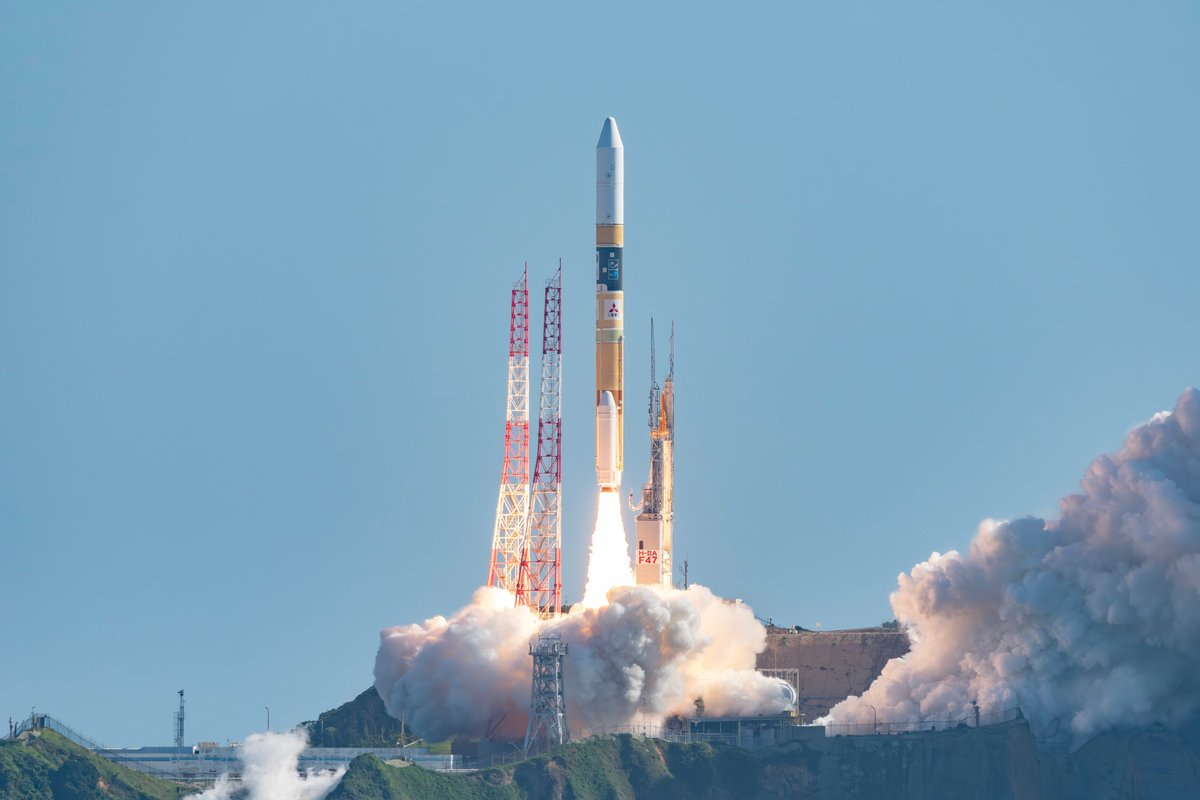

In [53]:
# prompt: response.content 이미지를 보려면

from IPython.display import Image

# Assuming 'response' is the variable holding the response from the request
if response.status_code == 200:
  display(Image(data=response.content))
else:
  print(f"Failed to download image. Status code: {response.status_code}")


In [54]:
import json
import requests
import requests.exceptions as requests_exceptions
import os

def get_pictures(*args, **kwargs):
    os.makedirs(f"image", exist_ok=True)
    with open("./rocket/launches.json") as f:
        launches = json.load(f)

    image_urls = [launch["image"] for launch in launches["results"]]
    print(image_urls)

    for image_url in image_urls:
        try:
            response = requests.get(image_url)
            image_filename = image_url.split("/")[-1]
            target_file = f"./image/{image_filename}"

            with open(target_file, "wb") as f:
                f.write(response.content)

            print(f"Downloaded {image_url} to {target_file}")

        except requests_exceptions.MissingSchema:
            print(f"{image_url} appears to be an invalid URL.")

        except requests_exceptions.ConnectionError:
            print(f"Could not connect to {image_url}.")

In [55]:
get_pictures()

['https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/h-iia_202_lifto_image_20240325123250.jpg', 'https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/long2520march25202d_image_20190222031211.jpeg', 'https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/falcon2520925_image_20220301072106.jpeg', 'https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/ceres-1_image_20230722081939.jpeg', 'https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/falcon2520925_image_20240101100955.jpeg', 'https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/falcon2520925_image_20221009234147.png', 'https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/vulcan_image_20240107162928.jpeg', 'https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/falcon_9_image_20230807133459.jpeg', 'https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/falcon_heavy_image_20220129192819.jpeg', 'https://thespacedevs-

## <font color='red'>**Block 3: Notify Launching Pictures**
> ### **@data_exporter**

In [60]:
len(os.listdir("./image/")) # 현재 images의 이미지 개수

10

In [61]:
import os

def notify(*args, **kwargs):
    images_count = len(os.listdir("./image/"))
    if images_count > 0:
        print(f"There are now {images_count} images.")
    else :
        print("No images downloaded")

In [62]:
notify()

There are now 10 images.


### **이미지 시각화하기**
- chat GPT 에게 "이미지 파일을 불러와서 시각화하는 코드 한 줄에 5장씩" prompt로 문의

In [59]:
import glob
glob.glob('./image/*')

['./image/long2520march25202d_image_20190222031211.jpeg',
 './image/falcon_heavy_image_20220129192819.jpeg',
 './image/falcon2520925_image_20221009234147.png',
 './image/h3-22_image_20230307130808.jpeg',
 './image/falcon2520925_image_20240101100955.jpeg',
 './image/h-iia_202_lifto_image_20240325123250.jpg',
 './image/falcon_9_image_20230807133459.jpeg',
 './image/ceres-1_image_20230722081939.jpeg',
 './image/vulcan_image_20240107162928.jpeg',
 './image/falcon2520925_image_20220301072106.jpeg']

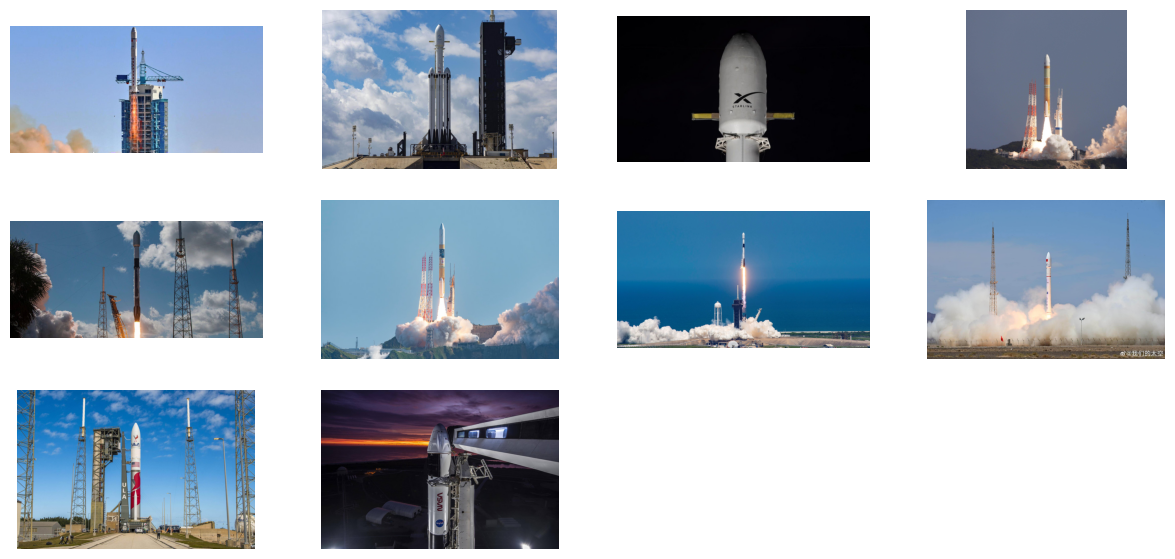

In [63]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_files = glob.glob('./image/*')

plt.figure(figsize=(15, 7))
for i, file in enumerate(image_files):
    plt.subplot(3, 4, i+1)  # 3행 4열의 그림 위치를 지정
    img = mpimg.imread(file)
    plt.imshow(img)
    plt.axis('off')
plt.show()

# END